## Feature Engineering Pipeline


In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install feature-engine

In [3]:
#data manupulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# for the saving pipeline
import joblib

# from Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


# from feature-engine
from feature_engine.transformation import LogTransformer, YeoJohnsonTransformer
from feature_engine.imputation import AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import DropFeatures
from sklearn.svm import SVR

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [4]:
# load data
file_path = "/content/drive/MyDrive/DataSet/Big Data data Sets/House Price/"
train_data =  f"{file_path}train.csv"
test_data = f"{file_path}test.csv"
df = pd.read_csv(train_data)
print(df.shape)
df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
X = df.drop(["Id", "SalePrice"], axis=1)
y = df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

x_train.shape, x_test.shape

((1314, 79), (146, 79))

In [6]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [7]:
CATEGORICAL_VARS_WITH_NA_FREQUENT = ['MasVnrType',
                                     'BsmtQual',
                                     'BsmtCond',
                                     'BsmtExposure',
                                     'BsmtFinType1',
                                     'BsmtFinType2',
                                     'Electrical',
                                     'GarageType',
                                     'GarageFinish',
                                     'GarageQual',
                                     'GarageCond', ]

CATEGORICAL_VARS_WITH_NA_MISSING = [
    'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

NUMERICAL_VARS_WITH_NA = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt',]

TEMPORAL_VARS = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
REF_VAR = "YrSold"

NUMERICALS_LOG_VARS = ["LotFrontage", "1stFlrSF", "GrLivArea"]

NUMERICALS_YEO_VARS = ['LotArea']

BINARIZE_VARS = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]


QUAL_VARS = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',]
GARAGE_VARS = ['GarageFinish']
FINISH_VARS = ["BsmtFinType1", "BsmtFinType2"]
EXPOSURE_VARS = ["BsmtExposure"]
FENCE_VARS = ["Fence"]

CATEGORICAL_VARS = [
    'MSZoning',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageType',
    'PavedDrive',
    'PoolQC',
    'MiscFeature',
    'SaleType',
    'SaleCondition',
    'MSSubClass']

QUAL_MAPPINGS = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "Missing": 0, "NA": 0,}
FINISH_MAPPINGS = {"Missing": 0, "NA": 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6,}
GARAGE_MAPPINGS = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3,}
EXPOSER_MAPPINGS = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0,}
FENCE_MAPPINGS = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,}

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class Mapper(BaseEstimator, TransformerMixin):
    def __init__(self, variables, mappings):
        if not isinstance(variables, list):
            raise ValueError("variable should be in list")
        self.variables = variables
        self.mappings = mappings

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        x = x.copy()
        for feature in self.variables:
            x[feature] = x[feature].map(self.mappings)
        return x

class RareCategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables, tol=0.05):
        if not isinstance(variables, list):
            raise ValueError("Variales should be in list")
        self.tol = tol
        self.variables = variables

    def fit(self, X, y=None):
        # persist frequent labels in dictionary
        self.encoder_dict_ = {}

        for var in self.variables:
            # the encoder will learn the most frequent categories
            t = pd.Series(X[var].value_counts(normalize=True))
            # frequent labels:
            self.encoder_dict_[var] = list(t[t >= self.tol].index)

        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            X[feature] = np.where(
                X[feature].isin(self.encoder_dict_[feature]),
                                X[feature], "Rare")

        return X


class CategoricalEnocder(BaseEstimator, TransformerMixin):
    import pandas as pd
    def __init__(self, variables):
        if not isinstance(variables, list):
            raise ValueError("variable should be in list")
        self.variables = variables
        self.encoder_dict_ = {}

    def fit(self, x, y):
        temp = pd.concat([x, y], axis=1)
        for feature in self.variables:
            x = temp.groupby([feature])["SalePrice"].mean().sort_values(ascending=True).index
            self.encoder_dict_[feature] = {j: i for i, j in enumerate(x)}
        return self

    def transform(self, x):
        x = x.copy()
        for feature in self.variables:
            x[feature] = x[feature].map(self.encoder_dict_[feature])
        return x


class TemporalVariableTransformation(BaseEstimator, TransformerMixin):
    def __init__(self, variables, reference_variable):
        if not isinstance(variables, list):
            raise ValueError("Variables should be in list")
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, x, y):
        return self

    def transform(self, x):
        x = x.copy()
        for feature in self.variables:
            x[feature] = x[self.reference_variable] - x[feature]
        return x

In [9]:
# Creating Pipeline
price_pipeline = Pipeline([
    # Missing Imputation
    ('missing_imputation', CategoricalImputer(
        imputation_method="missing", variables=CATEGORICAL_VARS_WITH_NA_MISSING)),

    # Frequent Imputation
    ('frequent_imputation', CategoricalImputer(
        imputation_method="frequent", variables=CATEGORICAL_VARS_WITH_NA_FREQUENT)),

    # Missing Indicator
    ('missing_indicator', AddMissingIndicator(variables=NUMERICAL_VARS_WITH_NA)),

    # Mean Imputation
    ('mean_imputation', MeanMedianImputer(
        imputation_method="median", variables=NUMERICAL_VARS_WITH_NA)),

    # Elapsed Time
    ('elapsed_time', TemporalVariableTransformation(
        variables=TEMPORAL_VARS, reference_variable=REF_VAR)),

    # Drop Feature
    ('drop_feature', DropFeatures(features_to_drop=[REF_VAR])),

    # Log Transformation
    ('log', LogTransformer(variables=NUMERICALS_LOG_VARS)),

    # yeoonshon Tranformation
    ('yeojonshon', YeoJohnsonTransformer(variables=NUMERICALS_YEO_VARS)),

    # Binarizer Transformation
    ('binarizer', SklearnTransformerWrapper(
        transformer=Binarizer(threshold=0), variables=BINARIZE_VARS)),

    # Qaulity Mapping
    ('mapper_qual', Mapper(
        variables=QUAL_VARS, mappings=QUAL_MAPPINGS)),

    # Exposer Mapping
    ('mapper_exposure', Mapper(
        variables=EXPOSURE_VARS, mappings=EXPOSER_MAPPINGS)),

     # Finish Mapping
    ('mapper_finish', Mapper(
        variables=FINISH_VARS, mappings=FINISH_MAPPINGS)),

    # Garage Mapping
    ('mapper_garage', Mapper(
        variables=GARAGE_VARS, mappings=GARAGE_MAPPINGS)),

    # Fence Mapping
    ('mapper_fence', Mapper(
        variables=FENCE_VARS, mappings=FENCE_MAPPINGS)),

    # Rare Label Encoder
    ('rare_label_enocder', RareCategoricalEncoder(variables=CATEGORICAL_VARS)),

    # Categorical Encoder'
    ('categorical_enocder', CategoricalEnocder(variables=CATEGORICAL_VARS)),

    # Scaler
    ('scaler', MinMaxScaler()),

    ('selector', SelectFromModel(Lasso(alpha=0.01, random_state=0))),
    # Model
    ('Lasso', SVR())
])


In [10]:
price_pipeline.fit(x_train, y_train)

Pipeline(steps=[('missing_imputation',
                 CategoricalImputer(variables=['Alley', 'FireplaceQu', 'PoolQC',
                                               'Fence', 'MiscFeature'])),
                ('frequent_imputation',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['MasVnrType', 'BsmtQual',
                                               'BsmtCond', 'BsmtExposure',
                                               'BsmtFinType1', 'BsmtFinType2',
                                               'Electrical', 'GarageType',
                                               'GarageFinish', 'GarageQual',
                                               'GarageCon...
                                               'BldgType', 'HouseStyle',
                                               'RoofStyle', 'RoofMatl',
                                               'Exterior1st', 'Exterior2nd',
                                               'MasVnrType', 'Foundation',
                                               'Heating', 'CentralAir',
                                               'Electrical', 'Functional',
                                               'GarageType', 'PavedDrive',
                                               'PoolQC', 'MiscFeature',
                                               'SaleType', 'SaleCondition',
                                               'MSSubClass'])),
                ('scaler', MinMaxScaler()),
                ('selector',
                 SelectFromModel(estimator=Lasso(alpha=0.01, random_state=0))),
                ('Lasso', SVR())])

In [11]:
# Predict And Evaluate
y_pred_train = price_pipeline.predict(x_train)
print("Train MSE: ", mean_squared_error(y_pred_train, y_train))
print("Train R2-SCORE: ", r2_score(y_pred_train, y_train))

y_pred_test = price_pipeline.predict(x_test)
print("Train MSE: ", mean_squared_error(y_pred_test, y_test))
print("Train R2-SCORE: ", r2_score(y_pred_test, y_test))

Train MSE:  0.01323563469063985
Train R2-SCORE:  0.9037061769840743
Train MSE:  0.01878214795538597
Train R2-SCORE:  0.8875688089281962


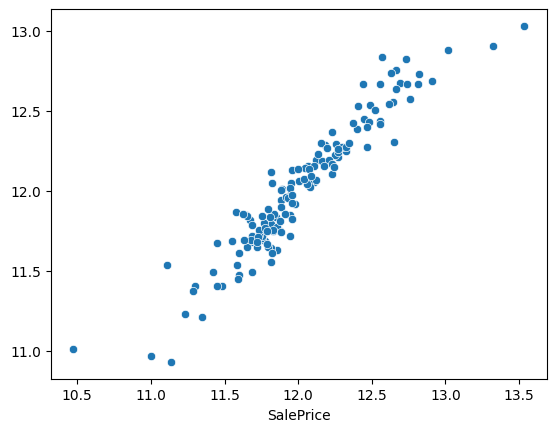

In [12]:
# Visualize Prediction
sns.scatterplot(x=y_test, y=y_pred_test)
plt.show()

## Machine Learning in Production Data Analysis

In [13]:
# Setting Data Again
# load data
file_path = "/content/drive/MyDrive/DataSet/Big Data data Sets/House Price/"
train_data =  f"{file_path}train.csv"
test_data = f"{file_path}test.csv"
df = pd.read_csv(train_data)
print(df.shape)
df.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

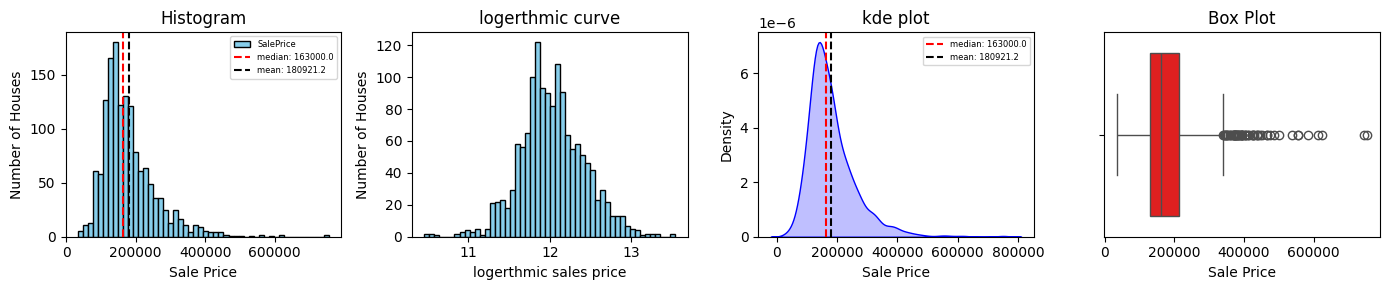

In [14]:
target = df["SalePrice"]
mean = round(target.mean(), 2)
median = round(target.median(), 2)

plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
target.plot(kind='hist', bins=50, color='skyblue', edgecolor="black")
plt.axvline(median, color='red', linestyle='--', linewidth=1.5, label= f'median: {median}')
plt.axvline(mean, color='black', linestyle='--', linewidth=1.5, label= f'mean: {mean}')
plt.ylabel("Number of Houses")
plt.xlabel("Sale Price")
plt.title("Histogram")
plt.legend(prop={"size": 6})
plt.tight_layout()

plt.subplot(1, 4, 2)
np.log(target).plot(kind='hist', bins=50, color='skyblue', edgecolor="black")
plt.ylabel("Number of Houses")
plt.xlabel("logerthmic sales price")
plt.title("logerthmic curve")
plt.tight_layout()

plt.subplot(1, 4, 3)
sns.kdeplot(target, fill=True, color="b", )
plt.axvline(median, color='red', linestyle='--', linewidth=1.5, label= f'median: {median}')
plt.axvline(mean, color='black', linestyle='--', linewidth=1.5, label= f'mean: {mean}')
plt.xlabel("Sale Price")
plt.legend(prop={"size": 6})
plt.title("kde plot")
plt.tight_layout()

plt.subplot(1, 4, 4)
sns.boxplot(target, color="red", orient="h")
plt.xlabel("Sale Price")
plt.title("Box Plot")
plt.tight_layout()

In [15]:
maximum = df["SalePrice"].max()
print(f"Maximum sales price is {maximum}")

Maximum sales price is 755000


In [16]:
nulls = df["SalePrice"].isnull().sum()
print(f"Number of nulls in target is {nulls}")

Number of nulls in target is 0


In [17]:
# Separate Categorical, Numerical, Temporal Data
cat_df = df.select_dtypes('O')

include = ["int64", "int32", "float32", "float64"]

num_df = df.select_dtypes(include=include).drop("SalePrice", axis=1)

print(f"Categorical Input Variable: {cat_df.shape[1]}")
print(f"Numerical Input Variable: {num_df.shape[1]}")

Categorical Input Variable: 43
Numerical Input Variable: 37


In [18]:
# Univariate Analysis of Categorical Data
def plot_nulls(df):
    x = df.isnull().sum().apply(lambda x: (x/len(df))*100).sort_values(ascending=False)
    x.plot(kind="bar")
    plt.xlabel("Categorical Variable")
    plt.ylabel("% of Nulls")
    plt.axhline(90, color="red", linewidth=1.5, linestyle="--", label = f"90%")
    plt.axhline(80, color="green", linewidth=1.5, linestyle="--", label = f"80%")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return x[x>0].index

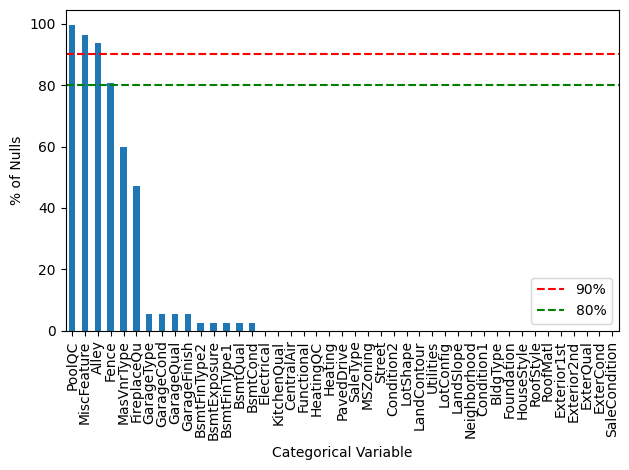

In [19]:
cat_null_columns = plot_nulls(cat_df)


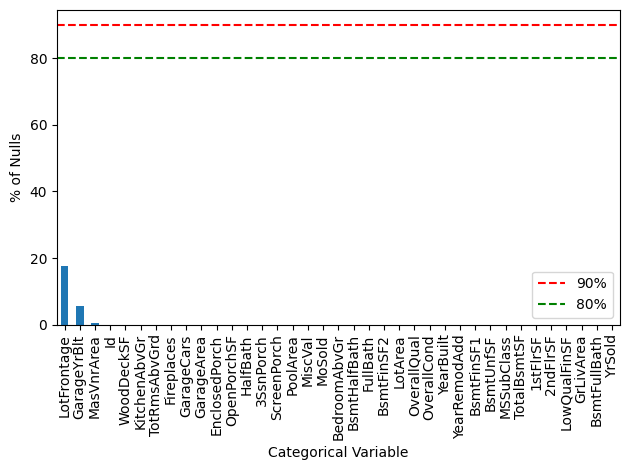

In [20]:
num_null_columns = plot_nulls(num_df)

In [21]:
# now we can determine which variables, from those with missing data
# are numerical and which are categorical
print("Number of categorical variables with na: ", len(cat_null_columns))
print("Number of numerical variables with na: ", len(num_null_columns))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [22]:
# Relation Between Missing Data and Sales Price
def analyse_na_value(df, var):
    # copy the dataframe, so that we do not override the original data
    df = df.copy()

    # let's make intermidiate variables that indicates 1 if the observation
    # was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observation with nan or without
    tmp = df.groupby([var])["SalePrice"].agg(["median", "std"])
    tmp.plot(kind="barh", y="median", legend=False, xerr="std", title="Sale Price", color="green")

    plt.show()

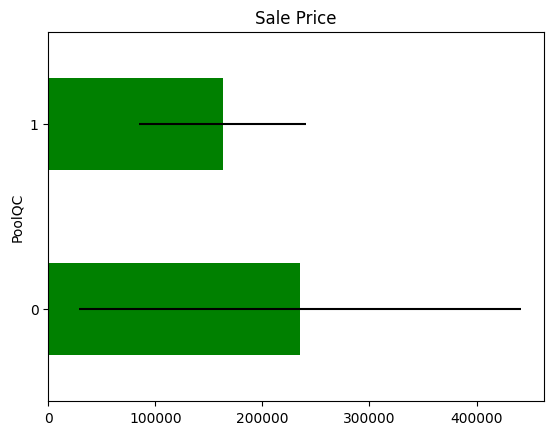

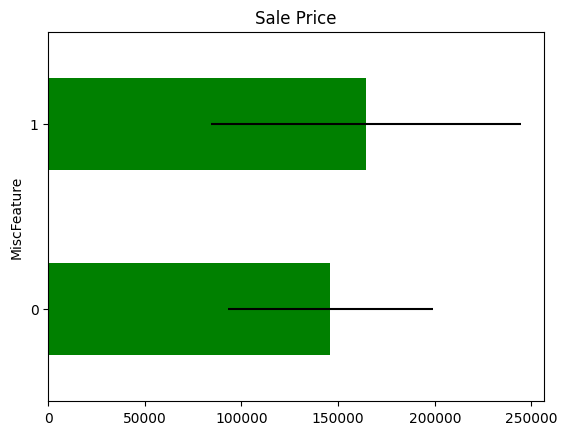

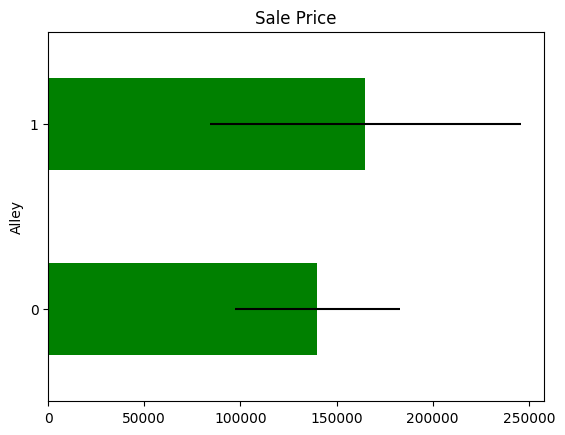

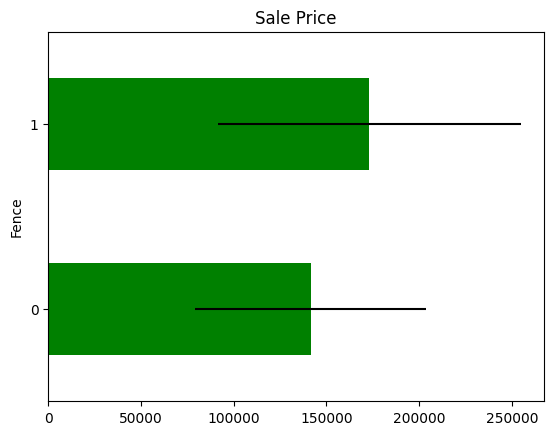

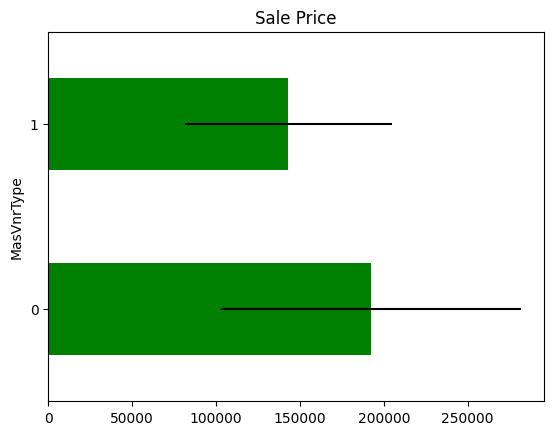

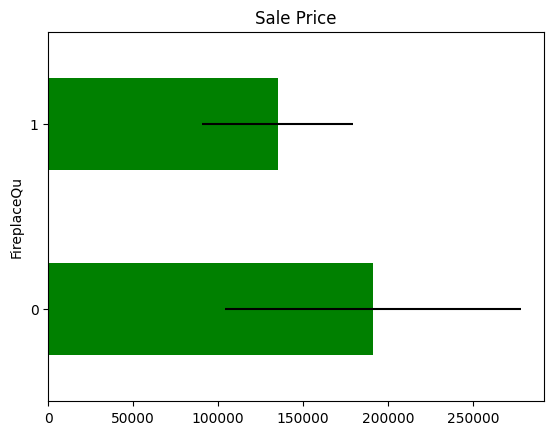

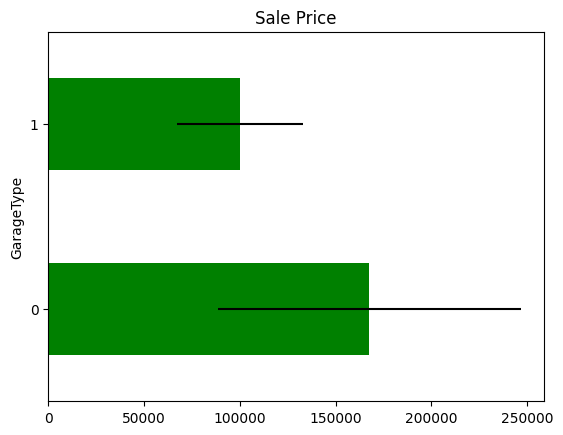

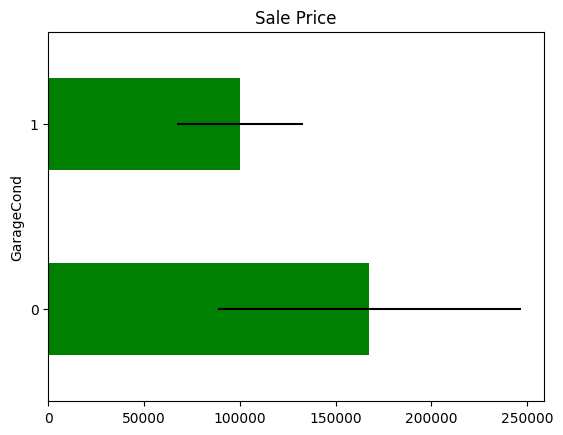

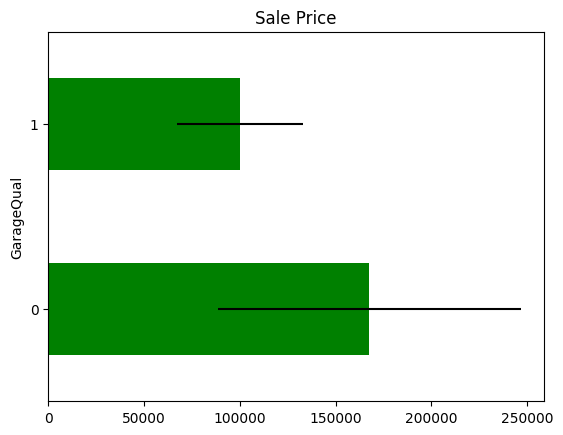

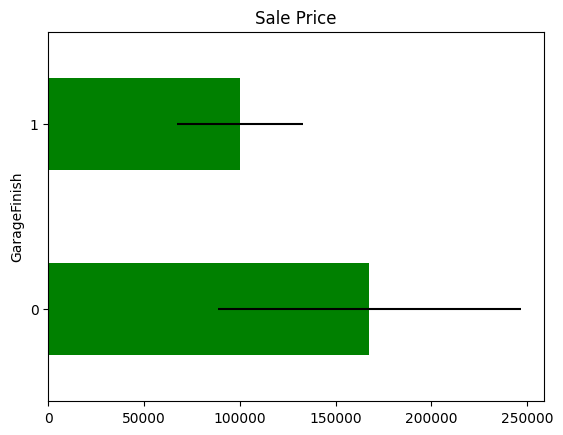

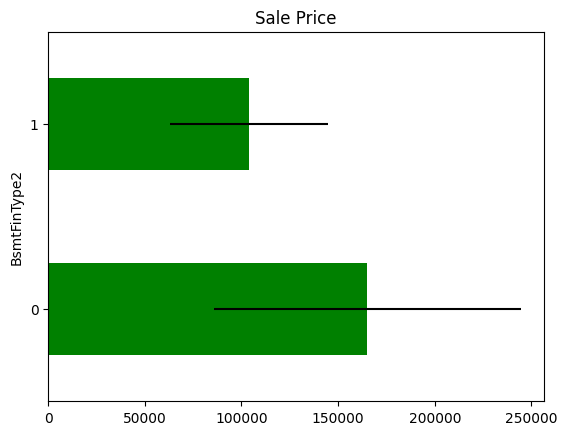

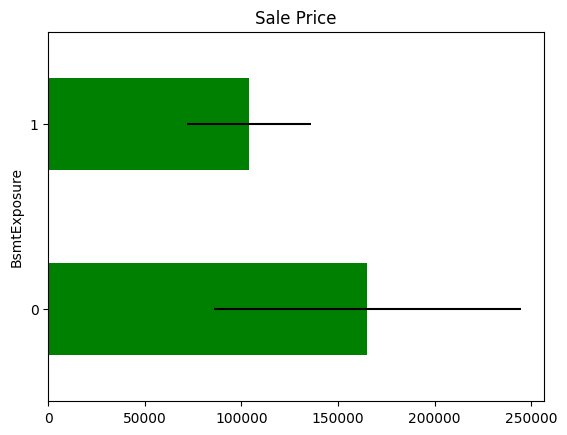

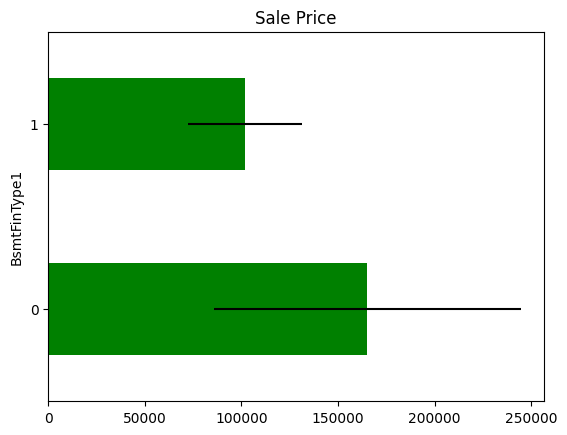

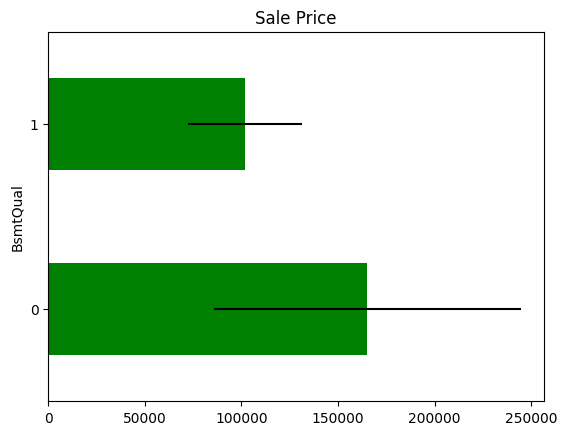

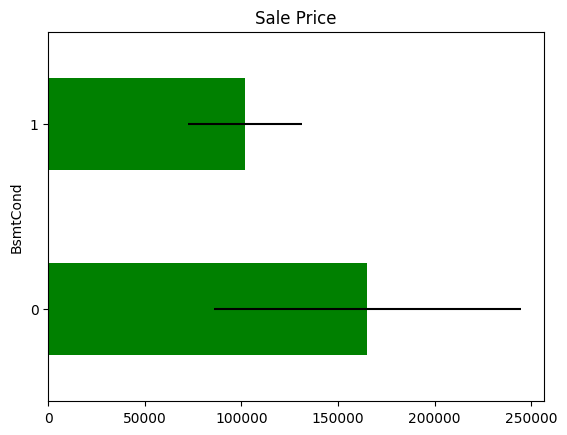

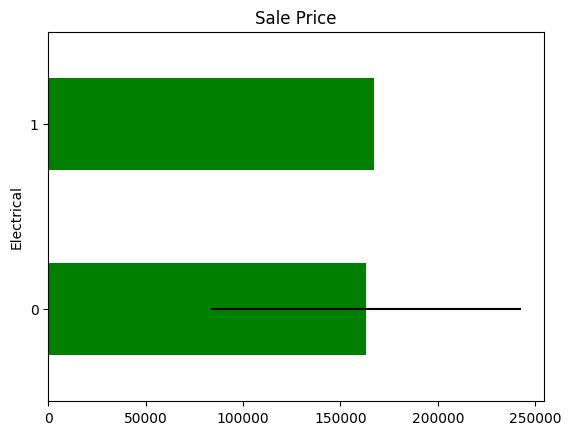

In [23]:
for col in cat_null_columns:
    analyse_na_value(df, col)

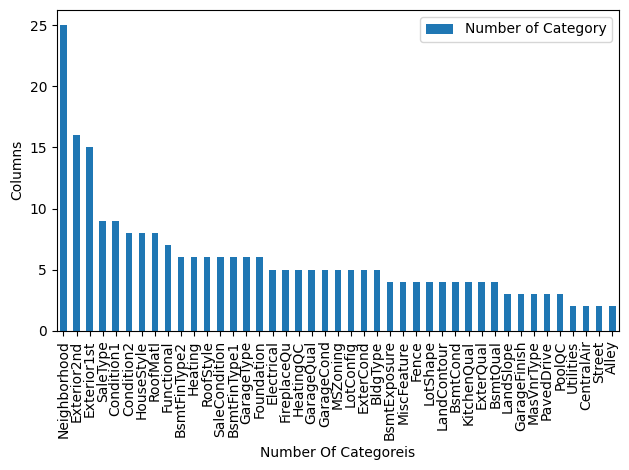

In [24]:
# Categorical Variables
pd.DataFrame([[i, cat_df[i].nunique()] for i in cat_df.columns],
             columns = ["columns", "Number of Category"]).sort_values(by="Number of Category", ascending=False).plot(
    kind="bar", x = "columns")
plt.xlabel("Number Of Categoreis")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

In [25]:
qual_mappings = {"po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5, "Missing": 0, "NA": 0}
finish_mappings = {"Missing": 0, "NA": 0, 'Unf': 1, 'Lwq': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}
Fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}


qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',

            ]
garage_vars = ['GarageFinish']
finish_vars = ["BsmtFinType1", "BsmtFinType2"]
exposer_vars = ["BsmtExposure"]
Fence_vars = ["Fence"]

for var in garage_vars:
    df[var] = df[var].map(garage_mappings)

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

for var in exposer_vars:
    df[var] = df[var].map(exposure_mappings)

for var in Fence_vars:
    df[var] = df[var].map(Fence_mappings)

In [26]:
quality_vars = qual_vars + garage_vars + finish_vars + exposer_vars + Fence_vars

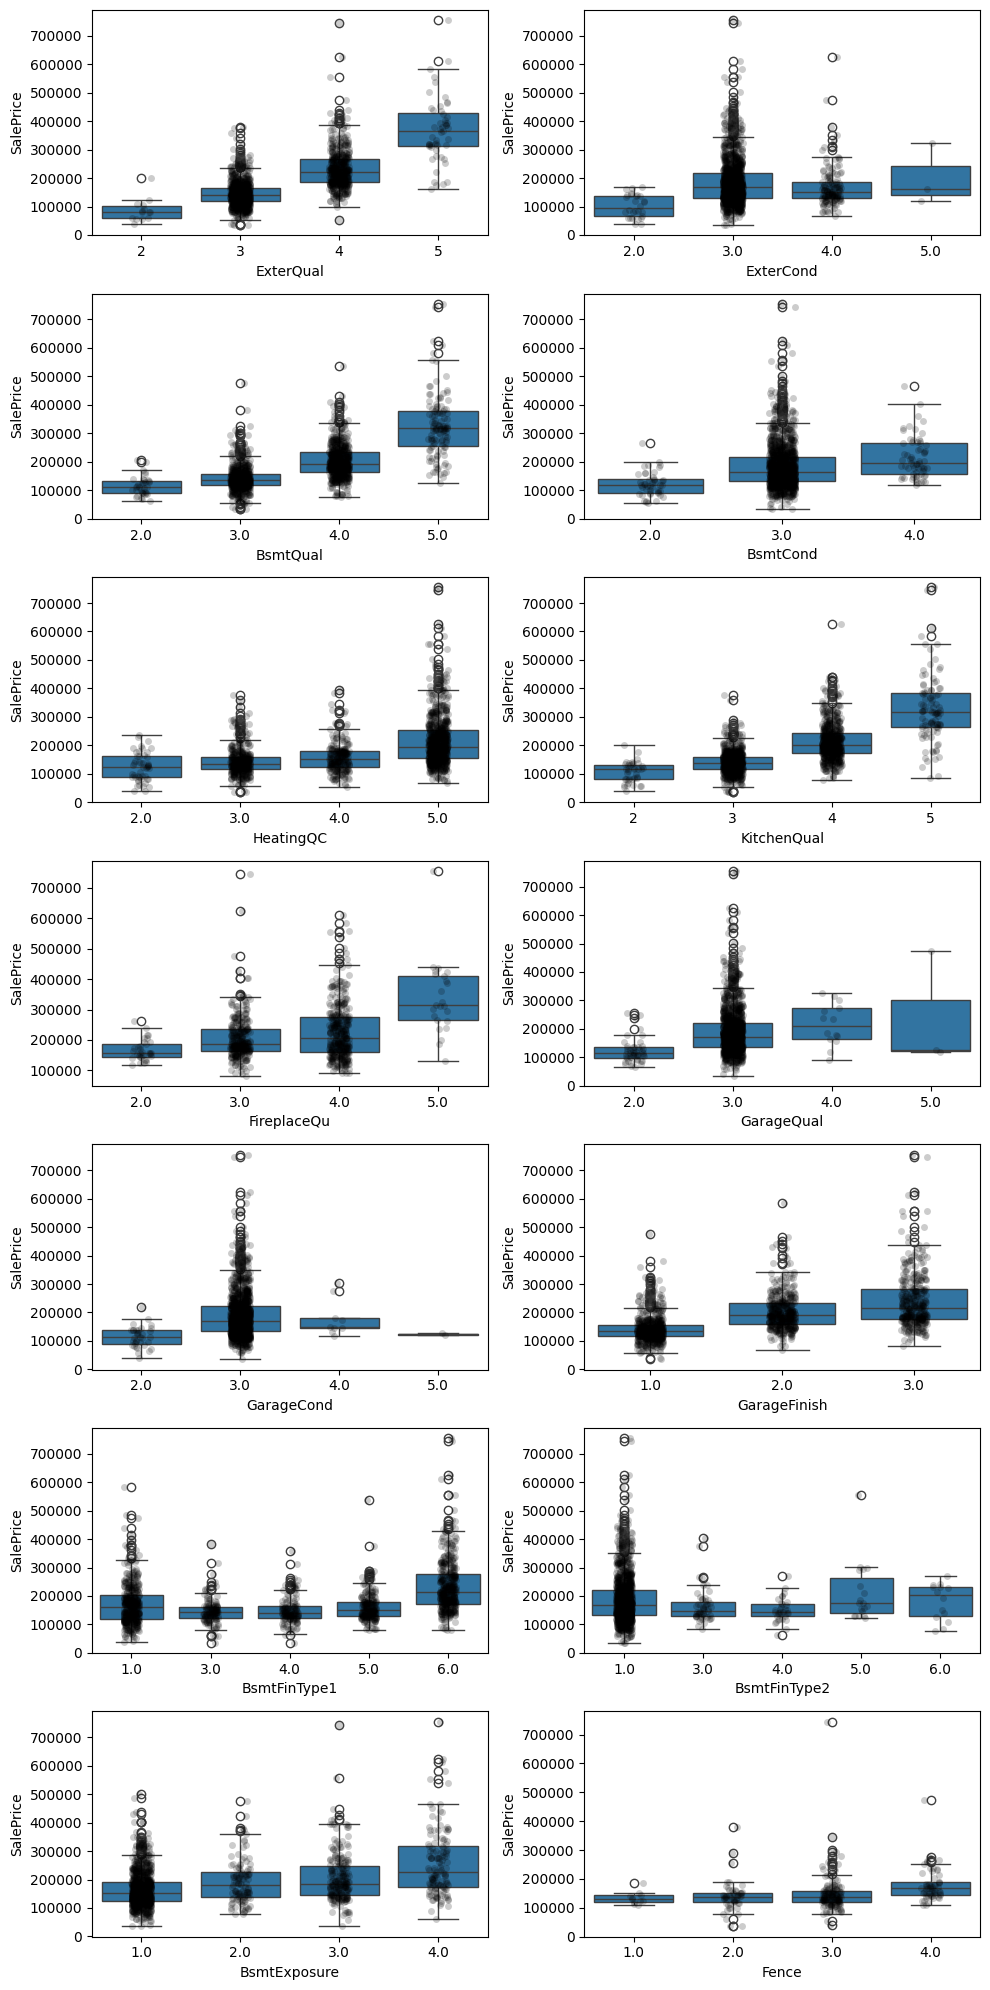

In [27]:
nrows=7
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 20))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[quality_vars].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[quality_vars].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

In [28]:
### capture the remaining categorical variables
others_cat = [col for col in cat_df.columns if col not in quality_vars]
len(others_cat)

29

In [29]:
# Rare Label
def analyse_rare_labels(df, var, rare_per):
    df = df.copy()

    #determine the % of observation per category

    tmp = df.groupby(var)['SalePrice'].count()/len(df)

    return tmp[tmp <= rare_per]


for col in others_cat:
    print(analyse_rare_labels(df, col, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

No more columns to plot


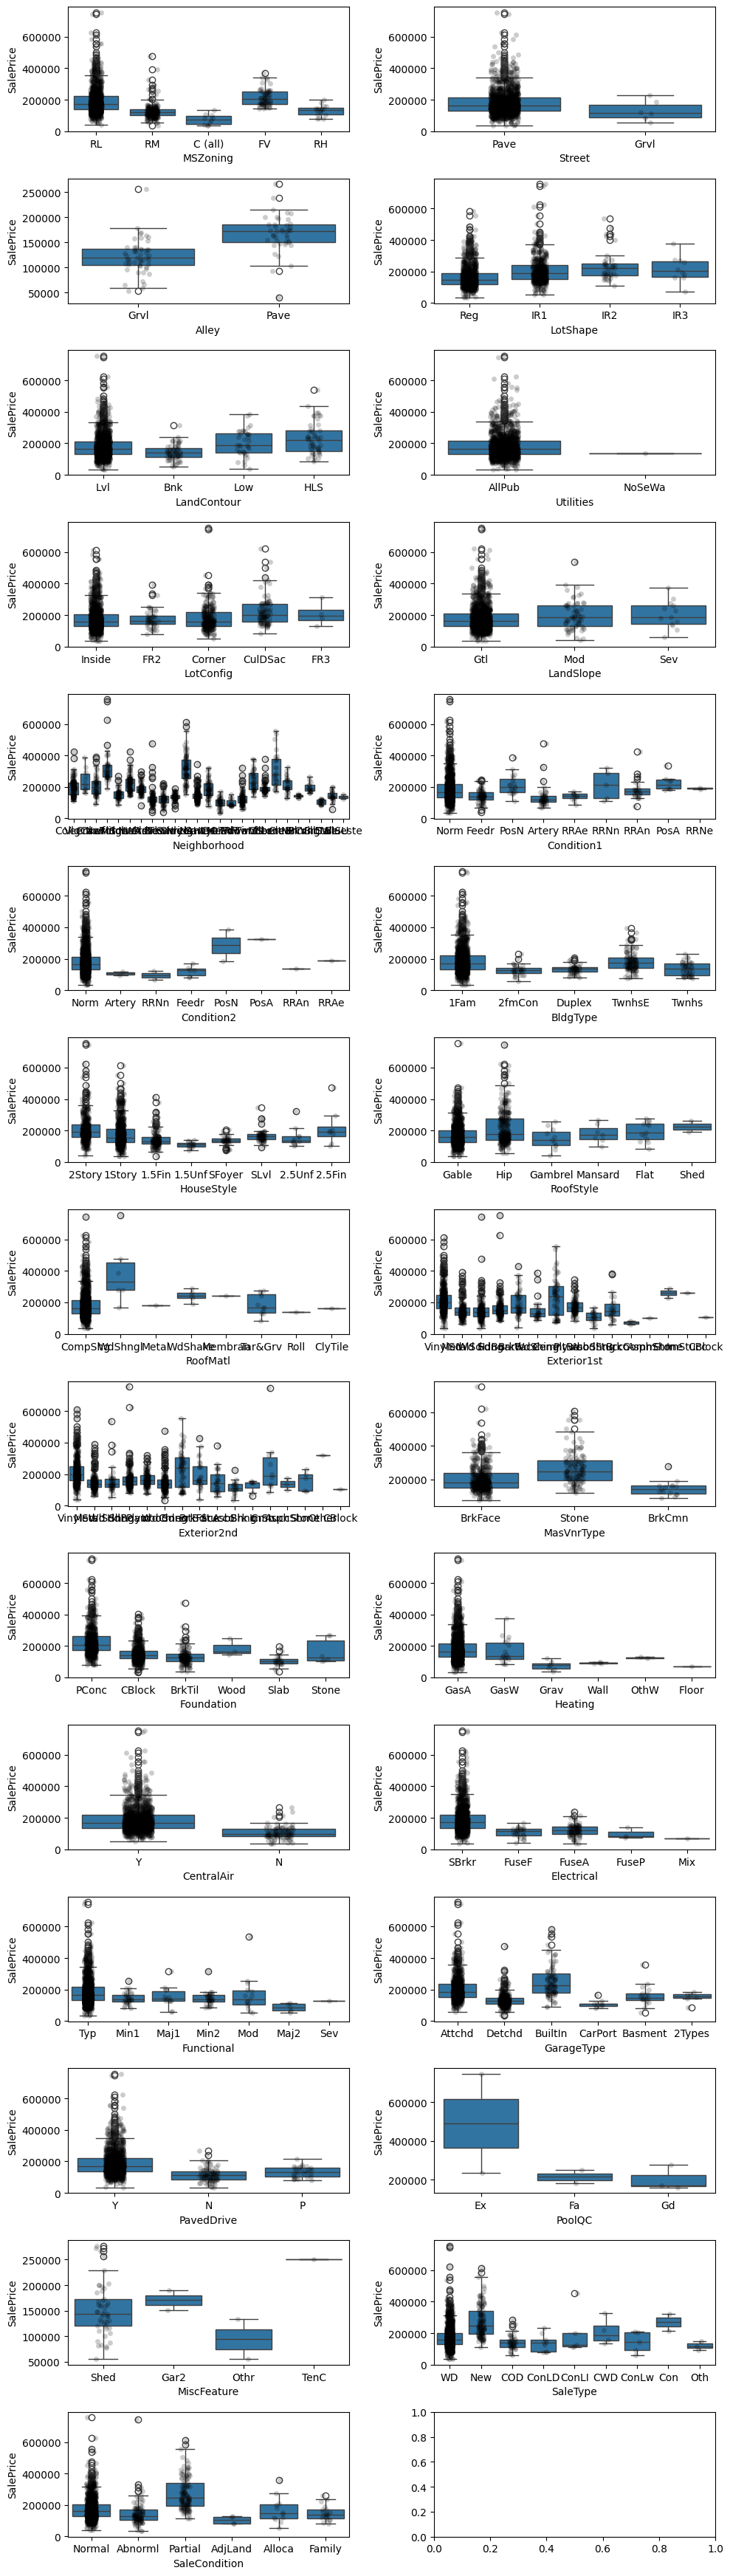

In [30]:
# Relation Between Other Categorical Variable and Price
nrows=15
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 35))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[others_cat].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[others_cat].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

In [31]:
# Temporal Variables
temporal_df = df[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]]

In [32]:
for col in temporal_df.columns:
    print(temporal_df[col].unique())

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930

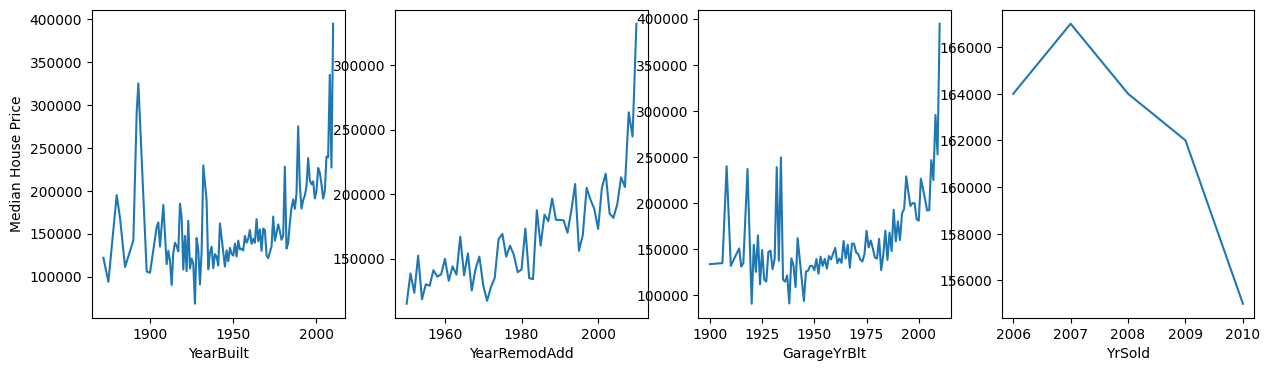

In [33]:
plt.figure(figsize=(15, 4))
plt.subplot(1,4,1)
plt.plot(df.groupby(["YearBuilt"]).agg({"SalePrice":"median"}))
plt.xlabel("YearBuilt")
plt.ylabel("Median House Price")

plt.subplot(1,4,2)
plt.plot(df.groupby(["YearRemodAdd"]).agg({"SalePrice":"median"}))
plt.xlabel("YearRemodAdd")

plt.subplot(1,4,3)
plt.plot(df.groupby(["GarageYrBlt"]).agg({"SalePrice":"median"}))
plt.xlabel("GarageYrBlt")

plt.subplot(1,4,4)
plt.plot(df.groupby(["YrSold"]).agg({"SalePrice":"median"}))
plt.xlabel("YrSold")
plt.show()

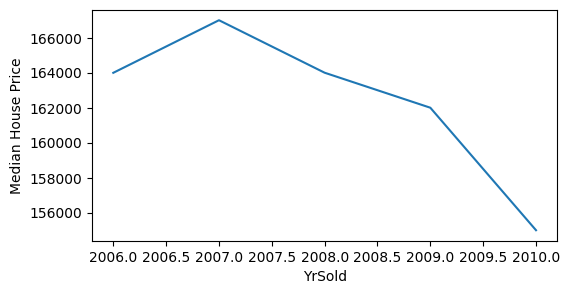

In [34]:
plt.figure(figsize=(6, 3))
plt.plot(df.groupby(["YrSold"]).agg({"SalePrice":"median"}))
plt.xlabel("YrSold")
plt.ylabel("Median House Price")
plt.show()

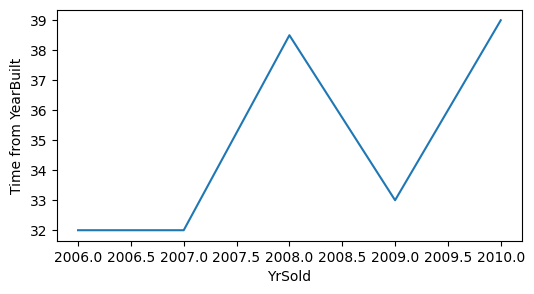

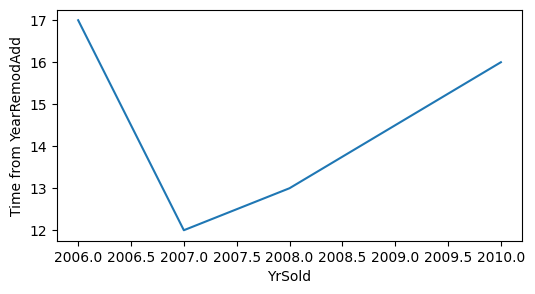

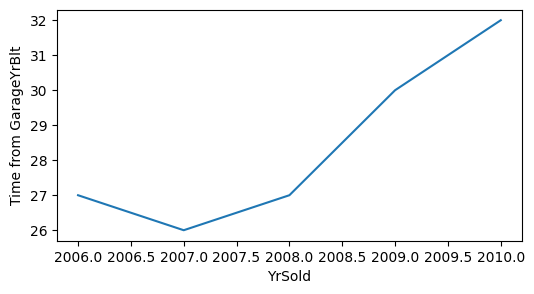

In [35]:
def analyse_year_vars(df, var):

    df = df.copy()
    df[var] = df["YrSold"] - df[var]
    plt.figure(figsize=(6, 3))
    df.groupby("YrSold")[var].median().plot()
    plt.ylabel("Time from "+ var)
    plt.show()

for col in temporal_df.columns:
    if col != "YrSold":
        analyse_year_vars(df, col)


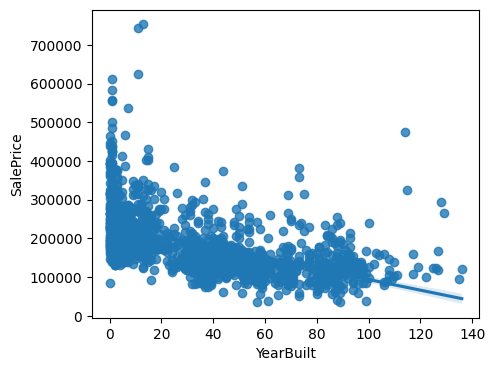

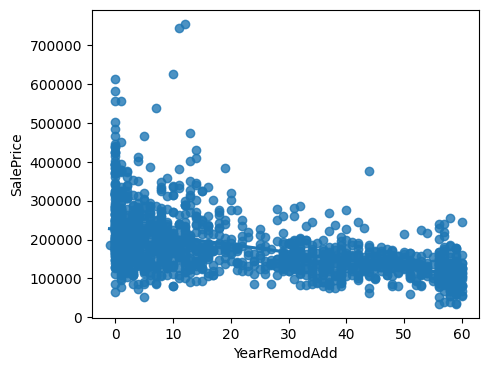

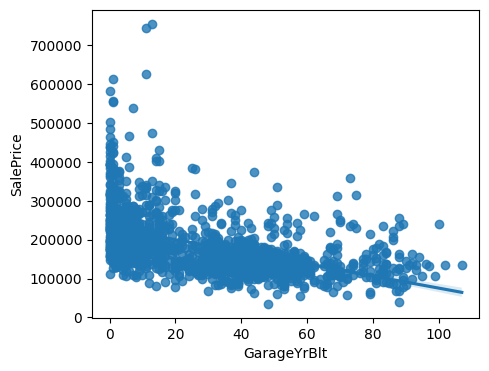

In [36]:
def analyse_years_col(df, var):
    df = df.copy()
    df[var] = df["YrSold"] - df[var]

    plt.figure(figsize=(5, 4))
    sns.regplot(x=df[var], y=df["SalePrice"])
    plt.show()

for col in temporal_df.columns:
    if col != "YrSold":
        analyse_years_col(df, col)

In [37]:
# Discrete Variable
# let's make list of descrete variable
# if the columns have less than 20 columns we consider as descrete variables
descrete_variables = [col for col in num_df.columns if num_df[col].nunique()<20 and col not in temporal_df.columns]
print(f"We have total {len(descrete_variables)} descrete variables")

We have total 14 descrete variables


In [38]:
df[descrete_variables].head()


MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

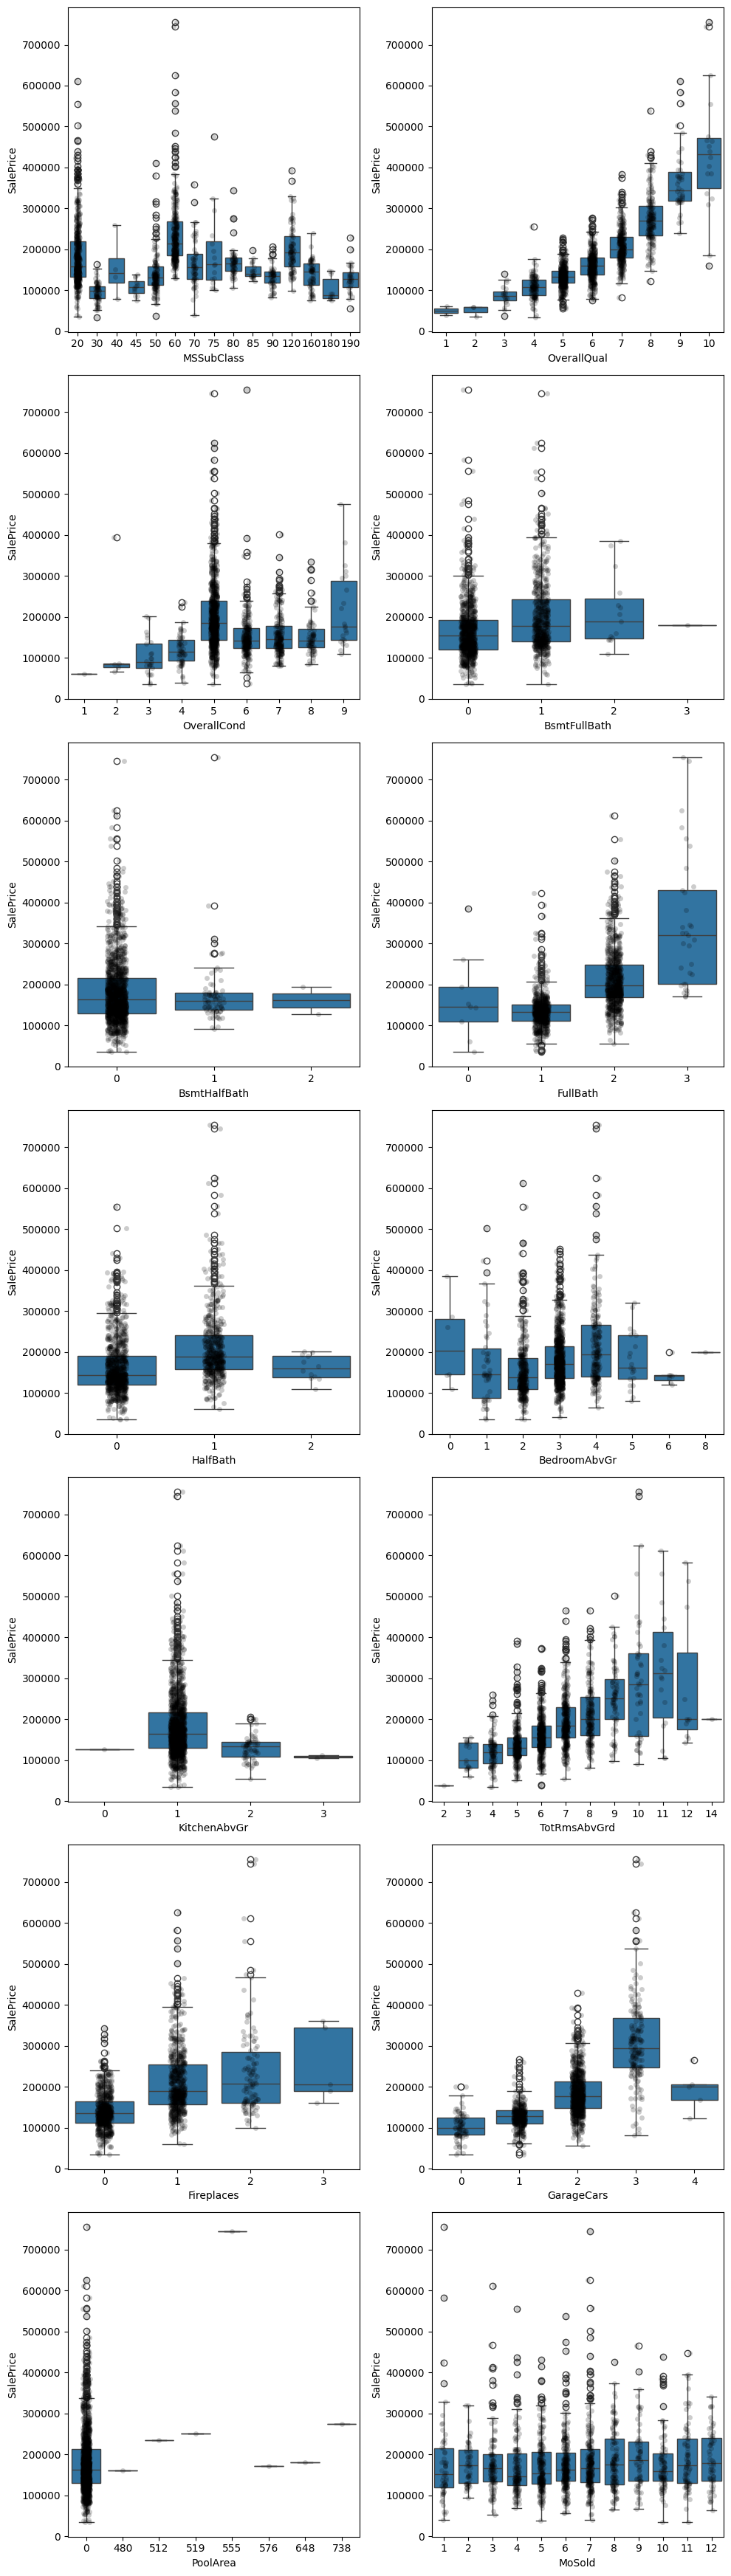

In [39]:
nrows=7
ncols=2
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 35))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            sns.boxplot(x=df[descrete_variables].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j])
            sns.stripplot(x=df[descrete_variables].iloc[:, k], y=df["SalePrice"],  ax=ax[i][j], jitter=0.1, alpha=0.2, color="k")
            k += 1
        except:
            print("No more columns to plot")
    plt.tight_layout()
plt.show()

In [40]:
# Countinous Variables
count_vars = [col for col in num_df.columns if col not in temporal_df.columns and col not in descrete_variables and col != "Id"]
print(f"Numbers of continous variables {len(count_vars)}")

Numbers of continous variables 18


In [41]:
df[count_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

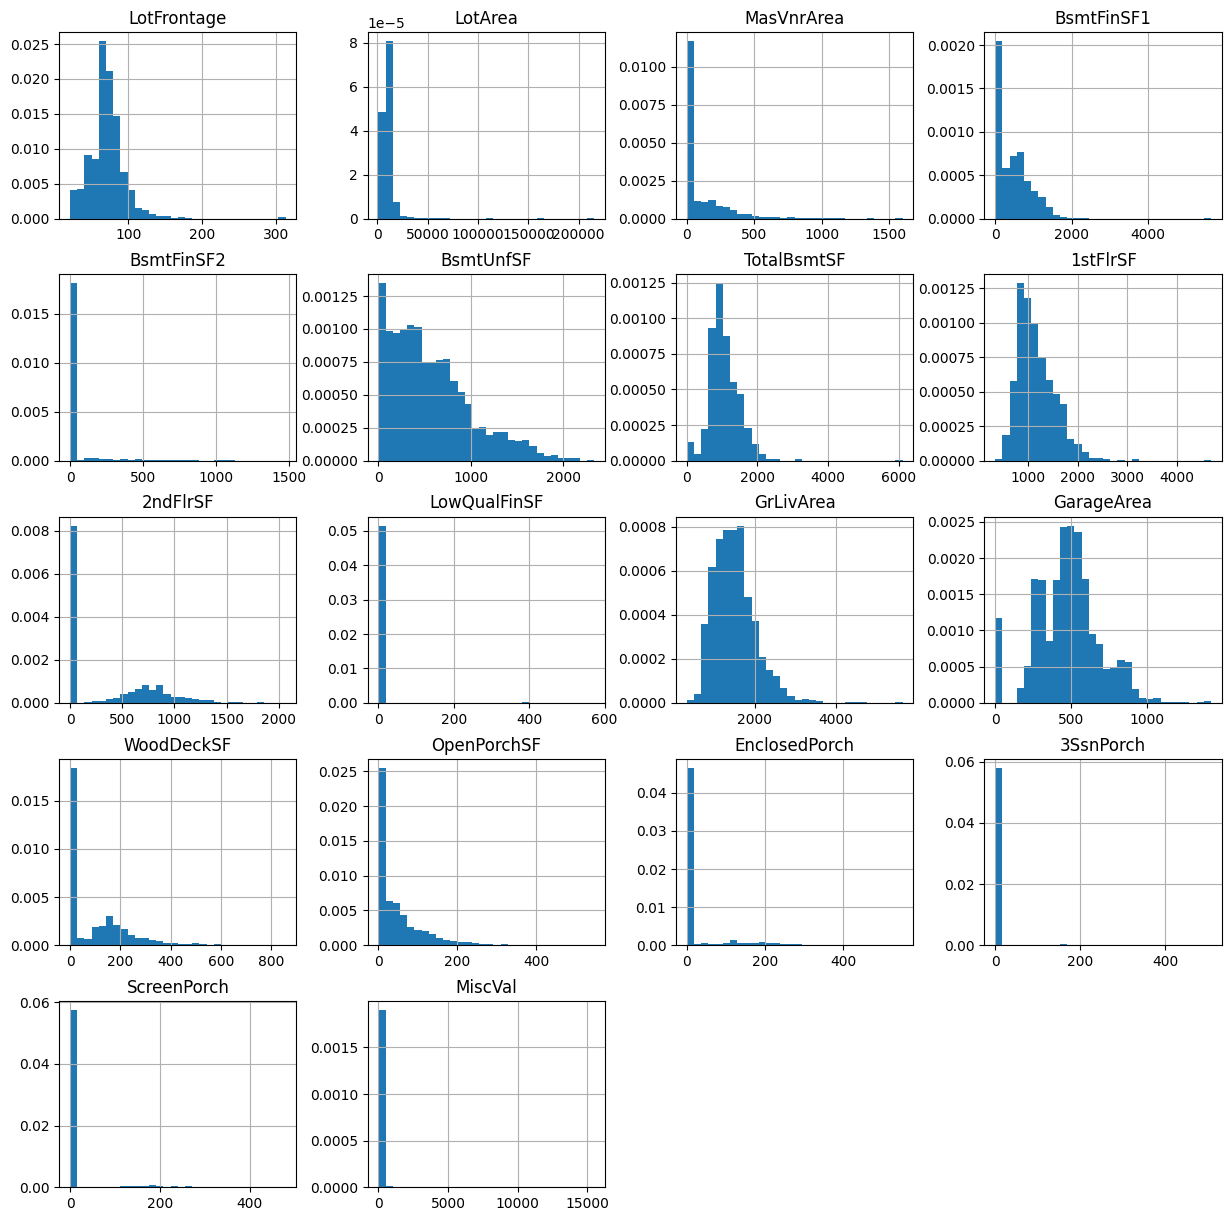

In [42]:
## let's plot histogram for all continous variables
df[count_vars].hist(bins = 30, figsize = (15, 15), density=True)
plt.show()

In [43]:
x = df[count_vars].skew().sort_values(ascending=False)
skewed_vars = x[x > 4].index
cont_vars = x[x < 4].index

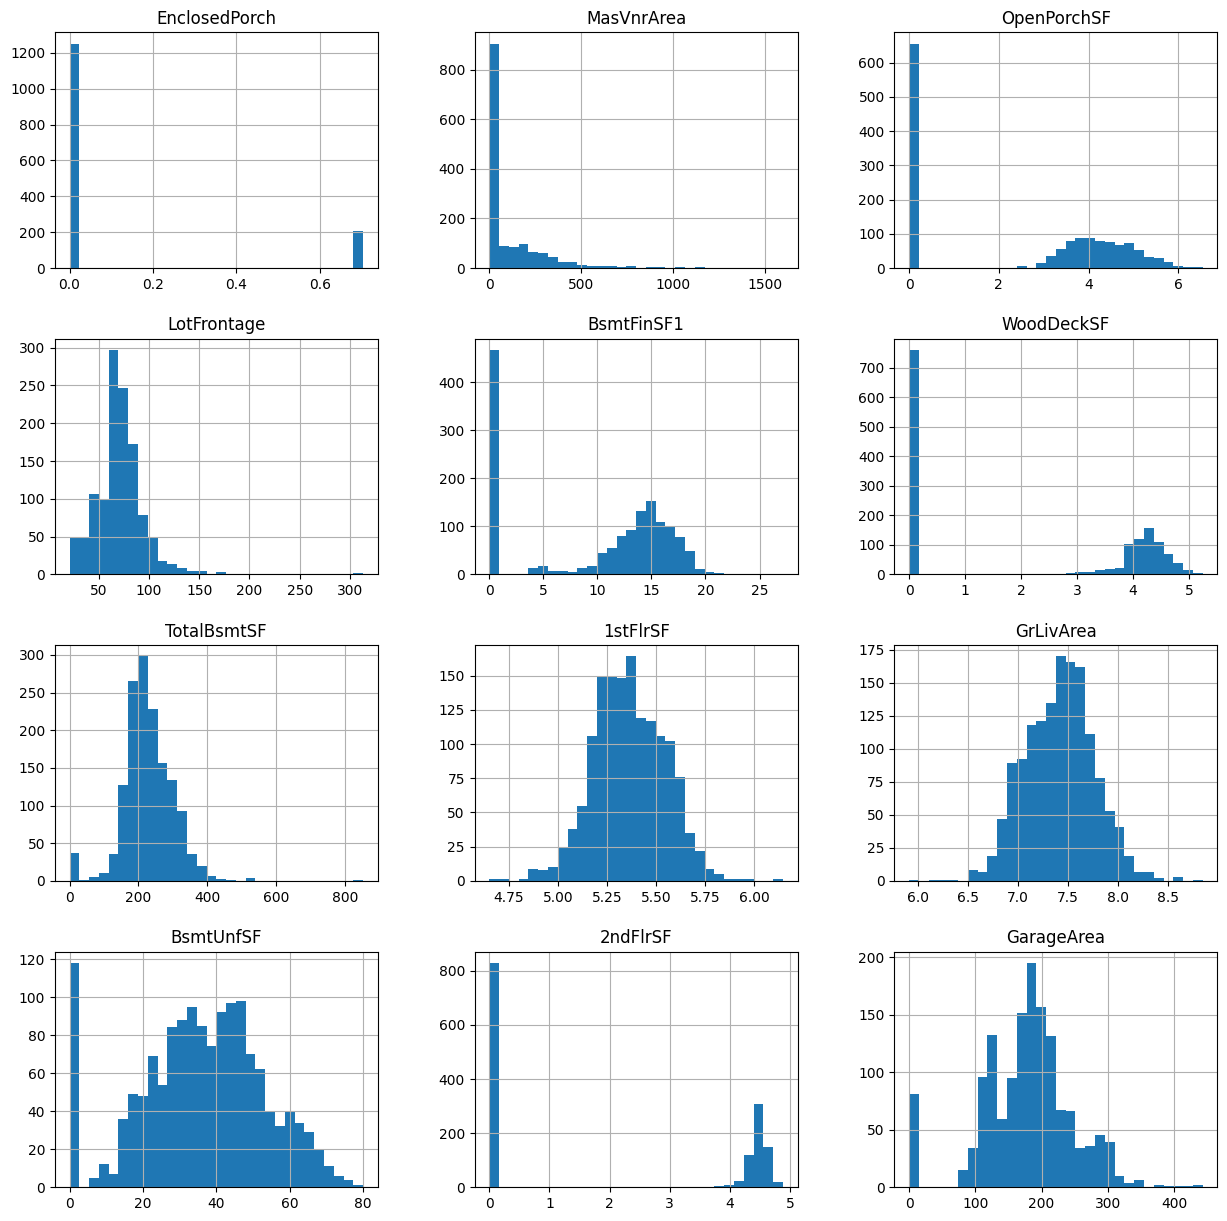

In [44]:
# Yeo - Johnson Transformation
tmp = df.copy()
for col in cont_vars:
    try:
        tmp[col], param = stats.yeojohnson(df[col])
    except:
        pass

tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

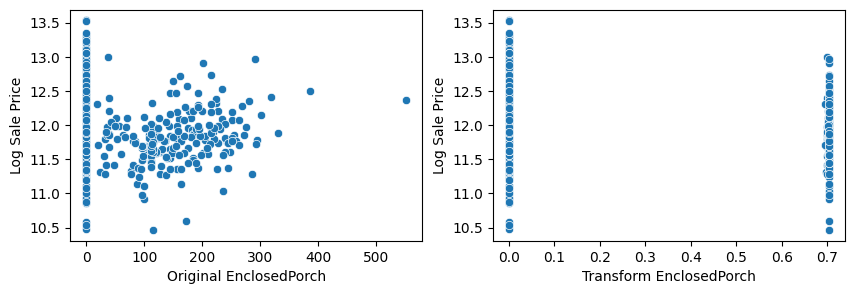

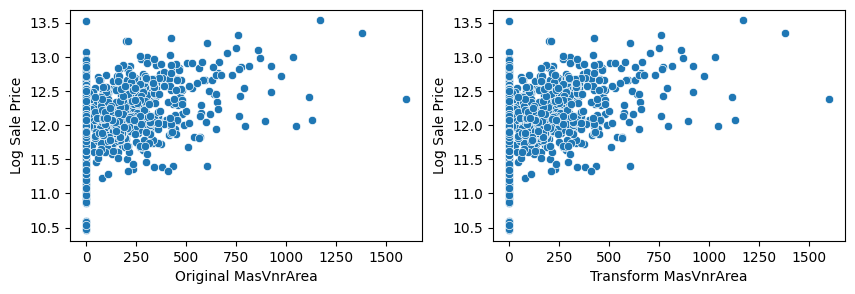

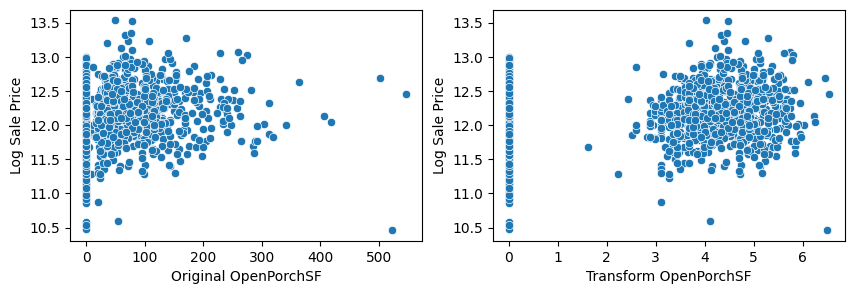

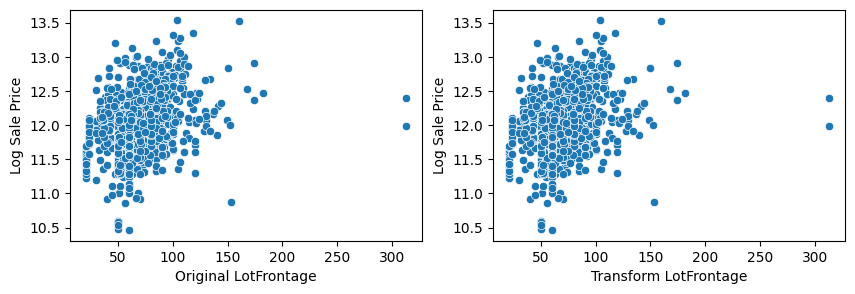

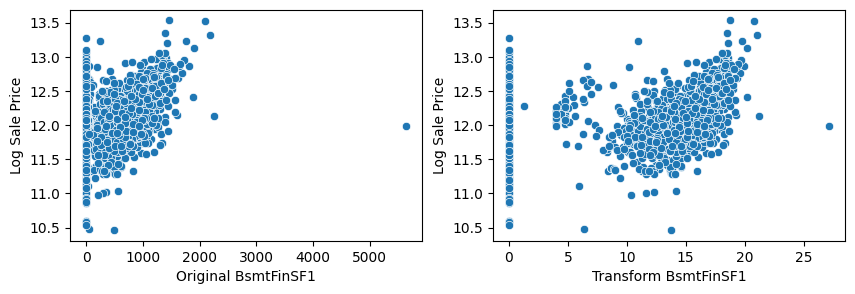

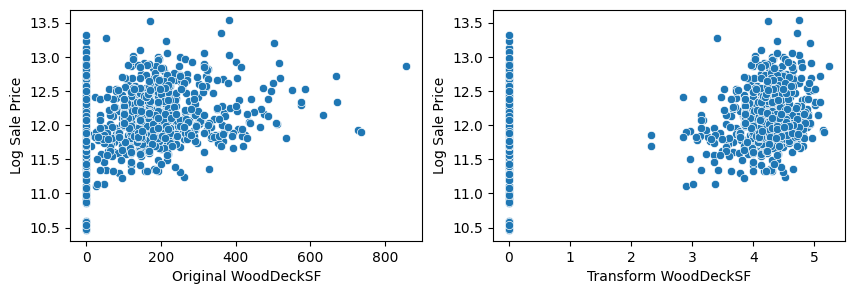

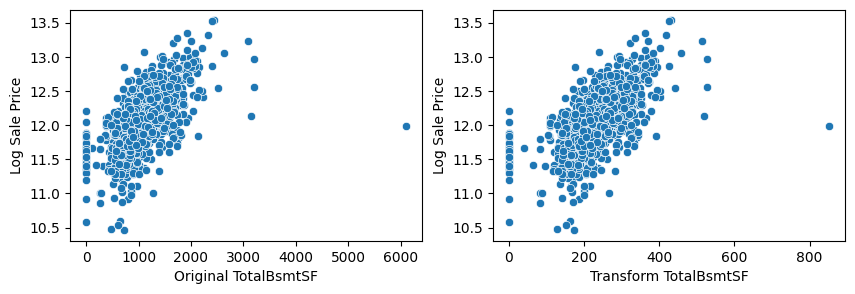

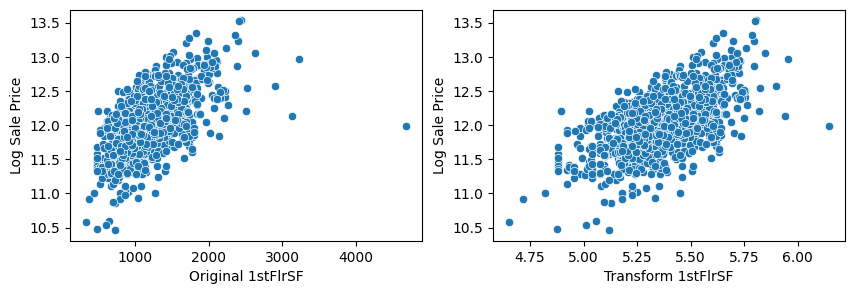

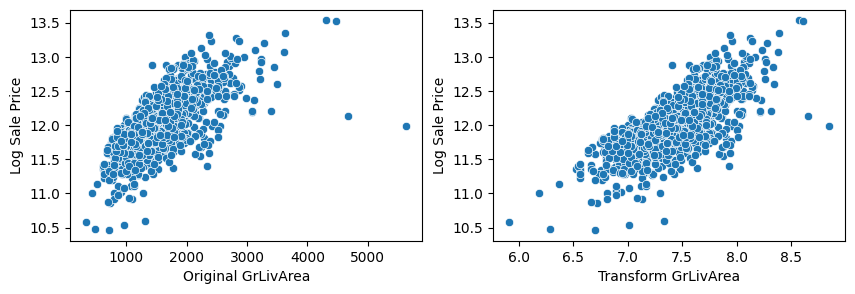

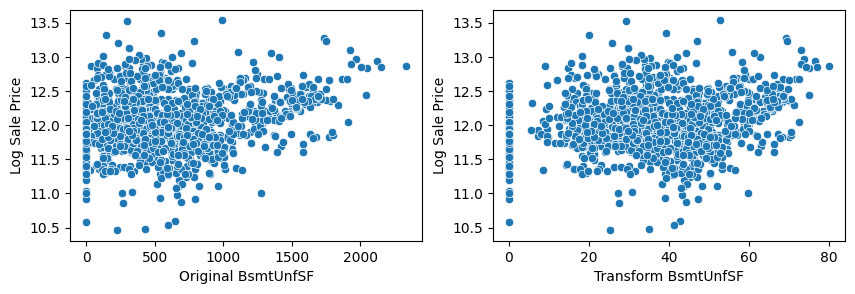

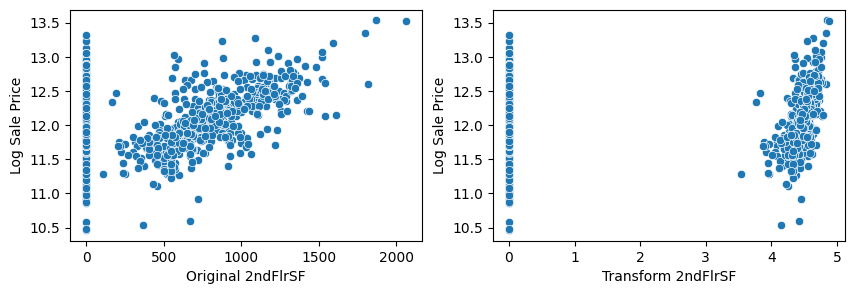

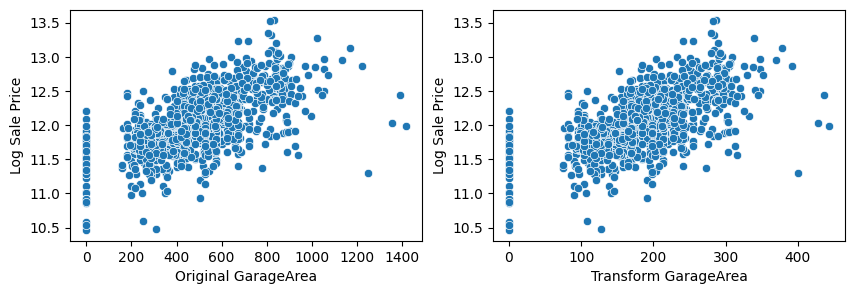

In [45]:
for var in cont_vars:

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)

    sns.scatterplot(x=df[var], y=np.log(df["SalePrice"]))
    plt.xlabel("Original " + var)
    plt.ylabel("Log Sale Price")

    plt.subplot(1, 2, 2)

    sns.scatterplot(x=tmp[var], y=np.log(df["SalePrice"]))
    plt.xlabel("Transform " + var)
    plt.ylabel("Log Sale Price")

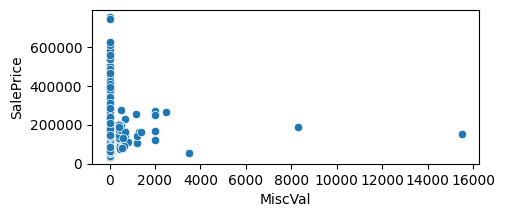

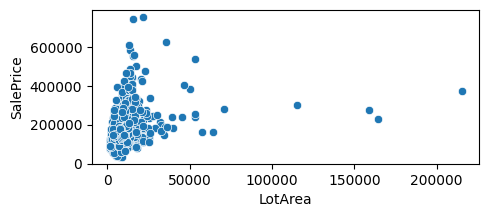

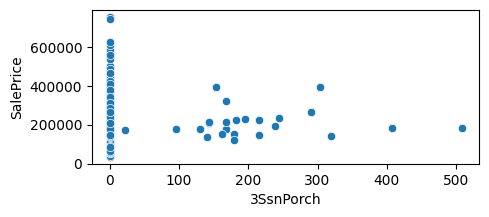

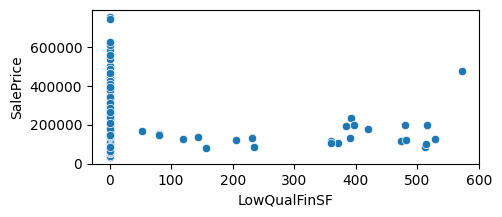

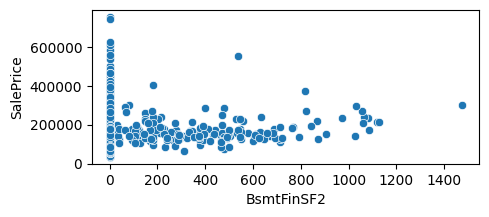

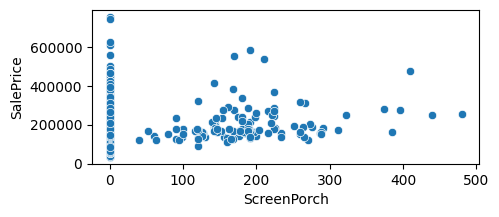

In [46]:
for col in skewed_vars:
    plt.figure(figsize=(5, 2))
    sns.scatterplot(x=df[col], y=df["SalePrice"])

## Machine Learning in Production Feature Selection

In [47]:
x_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
907          50       RL         86.0    11500   Pave   NaN      IR1   
782          20       RL         67.0    16285   Pave   NaN      IR2   
952          85       RL         60.0     7200   Pave   NaN      Reg   
620          30       RL         45.0     8248   Pave  Grvl      Reg   
669          30       RL         80.0    11600   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
907         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
782         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
952         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
620         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
669         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
907       Norm     1Fam     1.5Fin            7            7       1936   
782       Norm     1Fam     1Story            7            5       2001   
952       Norm     1Fam     SFoyer            5            8       1972   
620       Norm     1Fam     1Story            3            3       1914   
669       Norm     1Fam     1Story            4            5       1922   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
907          1987     Gable  CompShg     BrkFace     BrkFace        NaN   
782          2002     Gable  CompShg     VinylSd     VinylSd        NaN   
952          2003     Gable  CompShg     WdShing     HdBoard        NaN   
620          1950     Gable  CompShg      Stucco      Stucco        NaN   
669          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
907         0.0        Gd        TA     CBlock       Gd       TA           No   
782         0.0        Gd        TA      PConc       Gd       TA           No   
952         0.0        TA        Gd     CBlock       Gd       TA           Av   
620         0.0        TA        TA     BrkTil       TA       TA           No   
669         0.0        TA        TA     BrkTil       Fa       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
907          Rec         223          Unf           0        794         1017   
782          Unf           0          Unf           0       1413         1413   
952          GLQ         660          Unf           0        108          768   
620          BLQ          41          Unf           0        823          864   
669          Unf           0          Unf           0        700          700   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
907    GasA        Gd          Y      SBrkr      1020      1037             0   
782    GasA        Ex          Y      SBrkr      1430         0             0   
952    GasA        Gd          Y      SBrkr       768         0             0   
620    GasA        TA          N      FuseF       864         0             0   
669    GasA        Ex          Y      SBrkr      1180         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
907       2057             0             0         1         1             3   
782       1430             0             0         2         0             3   
952        768             0             1         1         0             2   
620        864             1             0         1         0             2   
669       1180             0             0         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
907             1          Gd             6        Typ           1   
782             1          Gd             6        Typ           0   
952             1          TA             5        Typ           0   
620      

In [48]:
y_train.head()

907    12.429216
782    12.139399
952    11.804849
620    11.112448
669    11.831379
Name: SalePrice, dtype: float64

In [49]:
# To convert String to Float
!pip install -q category_encoders

In [50]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
import pandas as pd  # Make sure pandas is imported
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn import metrics

In [51]:



# Assuming x_train and y_train are already defined

# If x_train is not a DataFrame, convert it to one with inferred column names
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train, columns=[str(i) for i in range(x_train.shape[1])])

# Get a list of object (string) columns, now from the DataFrame
object_cols = x_train.select_dtypes(include=['object']).columns.tolist()

# If no object columns are found, use all columns
if not object_cols:
    object_cols = x_train.columns.tolist()

# Reset the index of both x_train and y_train to ensure they match
x_train = x_train.reset_index(drop=True)  # drop=True avoids creating a new 'index' column
y_train = y_train.reset_index(drop=True)  # drop=True avoids creating a new 'index' column

# Create an encoder instance
encoder = ce.TargetEncoder(cols=object_cols)

# Fit the encoder on your training data and transform it
x_train = encoder.fit_transform(x_train, y_train)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Reassign x_train as a DataFrame with imputed values and original columns
x_train = pd.DataFrame(x_train_imputed, columns=x_train.columns)

# Now, you can refit the model:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))
sel_.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [52]:
sel_.get_support().sum()


42

In [53]:
sel_.get_support()


array([ True,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True])

In [54]:
selected_fetures = x_train.columns[(sel_.get_support())]

In [55]:
print("Total Features: ", x_train.shape[1])
print("Select Features: ", len(selected_fetures))
print("Feture with truncate zero: ", np.sum(sel_.estimator_.coef_ == 0))

Total Features:  79
Select Features:  42
Feture with truncate zero:  32


In [56]:
pd.Series(selected_fetures).to_csv("selected_features.csv", index=False)

In [57]:
# Model Training

# Get the selected feature names as a list and convert to lowercase
selected_feature_names = [name.lower() for name in selected_fetures.tolist()]

# Convert column names to lowercase in x_train and x_test
x_train.columns = [col.lower() for col in x_train.columns]
x_test.columns = [col.lower() for col in x_test.columns]

# Filter training and testing data using lowercase feature names
x_train = x_train[[col for col in selected_feature_names if col in x_train.columns]]
# Ensure that selected_feature_names are present in x_test columns and are numeric
selected_feature_names = [col for col in selected_feature_names if col in x_test.columns and pd.api.types.is_numeric_dtype(x_test[col])]

x_test = x_test[selected_feature_names]

# Get common numeric columns between x_train and x_test
common_numeric_cols = list(set(x_train.select_dtypes(include=['number']).columns) &
                          set(x_test.select_dtypes(include=['number']).columns))

# Data Cleaning - Only process common numeric columns
for col in common_numeric_cols:  # Use common_numeric_cols here
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

# Impute NaN values with mean
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [58]:
# regularization Regression Lasso
linear_model = Lasso(alpha=0.001, random_state=0)

In [59]:
linear_model.fit(x_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [60]:
## Evaluate the model
from sklearn import metrics
y_pred_train = linear_model.predict(x_train)
print("Train MSE: " , metrics.mean_squared_error(y_pred_train, y_train))
print("Train R2 Score: ", metrics.r2_score(y_pred_train, y_train))

print()

print("Test MSE: " , metrics.mean_squared_error(y_pred_test, y_test))
print("Test R2 Score: ", metrics.r2_score(y_pred_test, y_test))

Train MSE:  0.018069086134994847
Train R2 Score:  0.8662389666291781

Test MSE:  0.01878214795538597
Test R2 Score:  0.8875688089281962


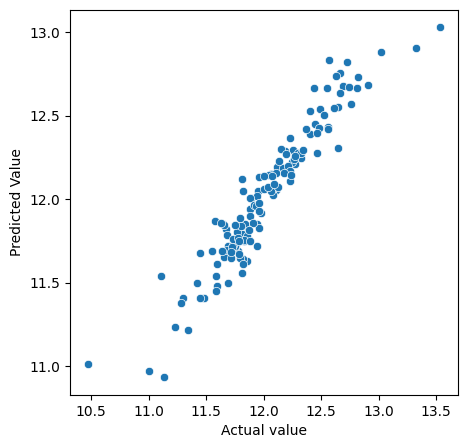

In [61]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.show()

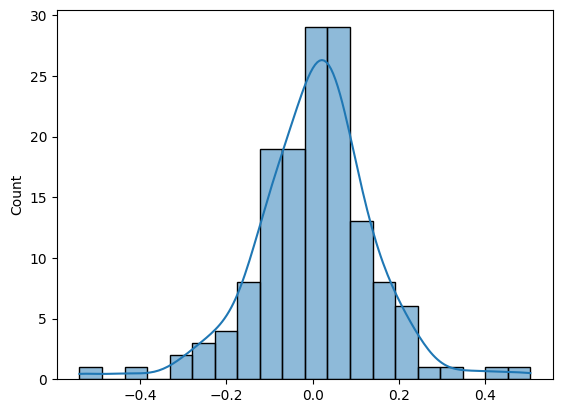

In [62]:
### let's find the evolution of error they should be normally distributed
sns.histplot(y_test.values.flatten()  - y_pred_test, kde=True)
plt.show()

In [63]:
# Feature Importance
features = pd.Series(np.abs(linear_model.coef_))
features.index = x_train.columns

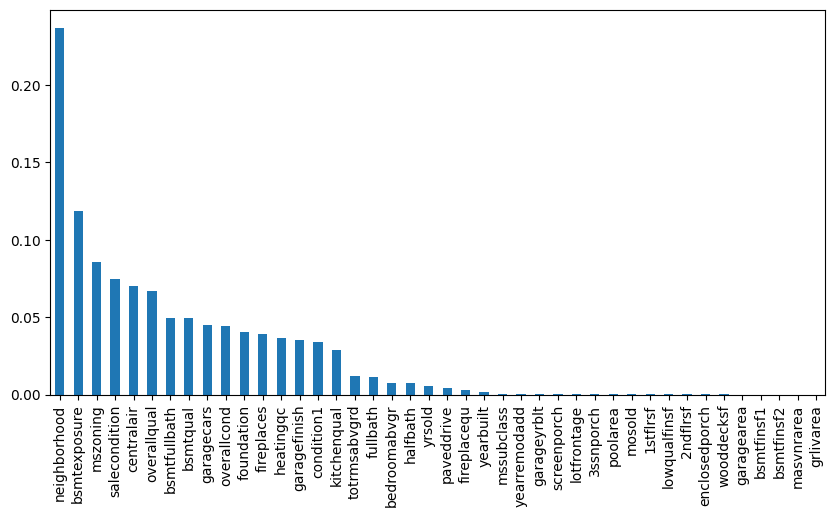

In [64]:
plt.figure(figsize=(10, 5))
features.sort_values(ascending=False).plot(kind="bar")
plt.show()